In [1]:
import osmnx as ox
import gradio as gr
import pandas as pd
from pub_crawl_script import pub_crawl
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

2558.238


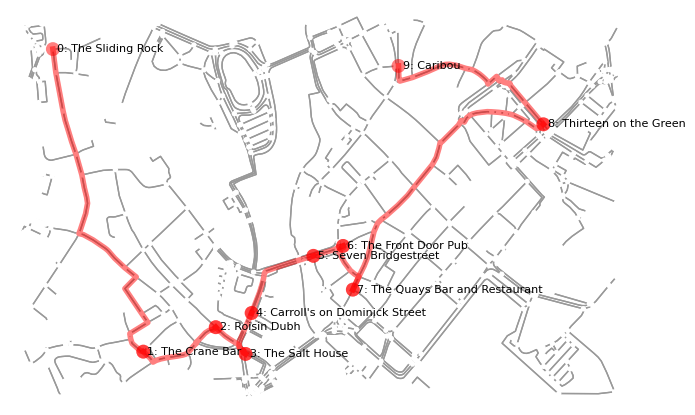

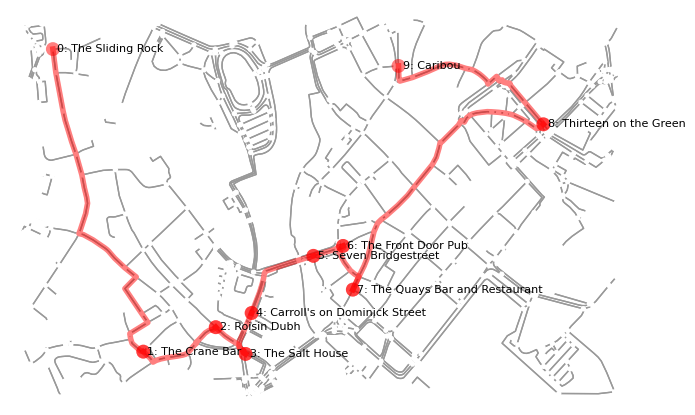

In [2]:
df = pd.read_csv('galway_pubs.csv')
G =  ox.io.load_graphml('galway.graphml')

crawler = pub_crawl(df, G)
crawler.optimise('The Sliding Rock')
print(crawler.optimal_distance)
crawler.plot_route(crawler.optimal_route)

In [4]:
def execute_crawl_optimiser(start_pub):
    # start_pub = 'The Sliding Rock'
    crawler = pub_crawl(df, G)
    crawler.optimise(start_pub)
    return crawler.optimal_distance, crawler.plot_route(crawler.optimal_route)

with gr.Blocks() as pub_crawl_ui:
    with gr.Row():
        with gr.Column():
            start_pub = gr.Dropdown(df['name'].to_list(), label="Start Pub")
            route_box = gr.CheckboxGroup(df['name'].to_list())
            run_btn = gr.Button("Run")
        with gr.Column():
            distance = gr.Number(value=None, label="Distance")
            route = gr.Textbox(label="Route")
            map = gr.Plot(label="Route")
    run_btn.click(fn=execute_crawl_optimiser, inputs=start_pub, outputs=[distance, map], api_name="pub_crawl")

pub_crawl_ui.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


c:\Users\Aidan\Documents\galway-pub-crawl\pub_crawl_script.py:82: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
c:\Users\Aidan\Documents\galway-pub-crawl\pub_crawl_script.py:82: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
c:\Users\Aidan\Documents\galway-pub-crawl\pub_crawl_script.py:82: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
c:\Users\Aidan\Documents\galway-pub-crawl\pub_crawl_script.py:82: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
c:\Users\Aidan\Documents\galway-pub-crawl\pub_crawl_script.py:82: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
